Variable               Type         Data/Info
---------------------------------------------
antall                 Series       Ukedag\nMandag     51\nOn<...>Name: count, dtype: int64
data                   DataFrame         Ukedag Klokkeslett  <...>n\n[217 rows x 4 columns]
dataframe_columns      function     <function dataframe_colum<...>ns at 0x000001FC1A744A40>
dataframe_hash         function     <function dataframe_hash at 0x000001FC1A744040>
dtypes_str             function     <function dtypes_str at 0x000001FC1A7444A0>
get_dataframes         function     <function get_dataframes at 0x000001FC1A7440E0>
getpass                module       <module 'getpass' from 'C<...>conda3\\Lib\\getpass.py'>
hashlib                module       <module 'hashlib' from 'C<...>conda3\\Lib\\hashlib.py'>
import_pandas_safely   function     <function import_pandas_s<...>ly at 0x000001FC1AF93E20>
is_data_frame          function     <function is_data_frame at 0x000001FC1AF93560>
json                   mo

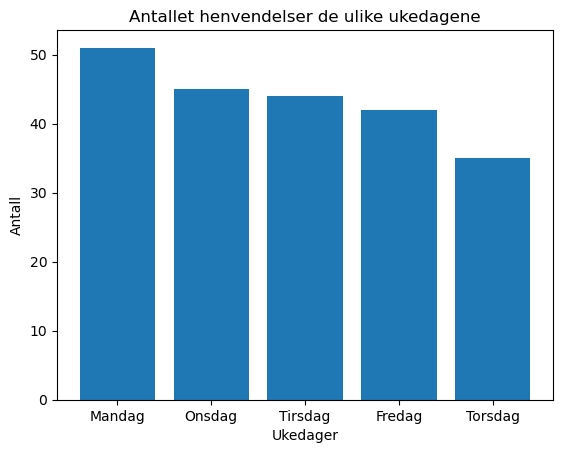

In [4]:
# Prosjektoppgave i emnet PY1010

# Del a)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lese excel-filen
data = pd.read_excel("support_uke_24.xlsx")

# Hente data fra kolonnen "Ukedag"
u_dag = data['Ukedag']


# Del b)

# Telle antall av ukedager
antall = u_dag.value_counts()

%whos
plt.bar(antall.index, antall.values)
plt.xlabel("Ukedager")
plt.ylabel("Antall")
plt.title("Antallet henvendelser de ulike ukedagene")
plt.show()


In [6]:
# Del c)

import numpy as np
import pandas as pd

# Lese excel-filen
data = pd.read_excel("support_uke_24.xlsx")

# Hente data fra kolonnen "Varighet"
varighet = data['Varighet']

# Finne minste og lengste samtalevarighet
min_varighet = np.min(varighet)
max_varighet = np.max(varighet)

# Skrive ut minste og lengste samtaletid
print(f"Minste samtaletid i uke 24: {min_varighet}")
print(f"Lengste samtaletid i uke 24: {max_varighet}")

Minste samtaletid i uke 24: 00:00:59
Lengste samtaletid i uke 24: 00:11:28


In [21]:
# Del d)

import pandas as pd

# Lese excel-filen
data = pd.read_excel("support_uke_24.xlsx")

# Hente data fra kolonnen "Varighet"
varighet = data['Varighet']

# Konvertere varighet til sekunder
def varighet_til_sekunder(Varighet):
    h, m, s = map(int, Varighet.split(':'))
    return h * 3600 + m * 60 + s

varighet_i_sekunder = varighet.apply(varighet_til_sekunder)

# Beregne gjennomsnittlig varighet 
gjennomsnitt_i_sekunder = varighet_i_sekunder.mean()

# Konverterer gjennomsnittlig varighet tilbake til hh:mm:ss-formatet
gjennomsnitt_timer = int(gjennomsnitt_i_sekunder // 3600)
gjennomsnitt_minutter = int((gjennomsnitt_i_sekunder % 3600) // 60)
gjennomsnitt_sekunder = int(gjennomsnitt_i_sekunder % 60)

gjennomsnittlig_varighet = f"{gjennomsnitt_timer:02}:{gjennomsnitt_minutter:02}:{gjennomsnitt_sekunder:02}"

# Skrive ut gjennomsnittlig varighet
print(f"Gjennomsnittlig varighet: {gjennomsnittlig_varighet}")

Gjennomsnittlig varighet: 00:06:40


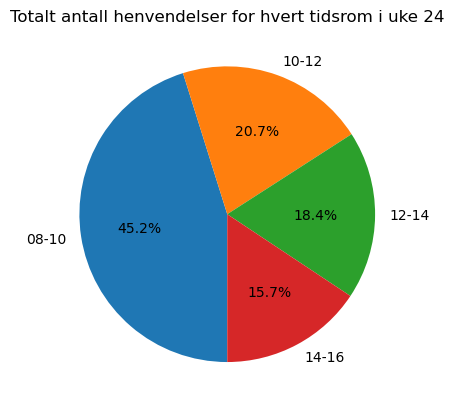

In [31]:
# Del e)

import pandas as pd
import matplotlib.pyplot as plt

# Lese Excel-filen
data = pd.read_excel("support_uke_24.xlsx")

# Henter kolonnen "Klokkeslett"
klokkeslett = data['Klokkeslett']

# Lager tidsrommene
tidsrom = ["08-10", "10-12", "12-14", "14-16"]

# Funksjon for å bestemme hvilket tidsrom en gitt time hører til
def bestem_tidsrom(time):
    time = int(time.split(':')[0])
    if 8 <= time < 10:
        return "08-10"
    elif 10 <= time < 12:
        return "10-12"
    elif 12 <= time < 14:
        return "12-14"
    elif 14 <= time < 16:
        return "14-16"
    else:
        return None

# Lager en ny kolonne med tidsrommene
data["Tidsrom"] = klokkeslett.apply(bestem_tidsrom)

# Tar bort eventuelle rader med "None" i
data = data.dropna(subset=['Tidsrom'])

# Teller antall henvendelser i hvert tidsrom
henvendelser_i_tidsrom = data['Tidsrom'].value_counts()

# Plotting av sektordiagram
henvendelser_i_tidsrom.plot.pie(
    autopct = '%1.1f%%', 
    startangle = -90, 
    labels = tidsrom, 
    counterclock = False
)
plt.title('Totalt antall henvendelser for hvert tidsrom i uke 24')
plt.ylabel('')
plt.show()


In [14]:
# Del f)

import pandas as pd

# Lese Excel-filen
data = pd.read_excel("support_uke_24.xlsx")

# Henter kolonnen "Tilfredshet"
score = data['Tilfredshet']

# Teller antall positive kunder (9-10) og negative kunder (0-6)
antall_positive = ((score >= 9) & (score <= 10)).sum()
antall_negative = ((score >= 0) & (score <= 6)).sum()

# Totalt antall respondenter
totalt_antall = len(data)

# Beregner prosent av positive og negative kunder
if totalt_antall > 0:
    prosent_positive = (antall_positive / totalt_antall) * 100
    prosent_negative = (antall_negative / totalt_antall) * 100
else:
    prosent_positive = 0
    prosent_negative = 0

# Total NPS-score
nps_score = prosent_positive - prosent_negative

# Skriver ut NPS
print(f"NPS-score: {nps_score}")


NPS-score: 8.294930875576036
